Code usinng for removing the last column:
 for i in *.txt; do rev $i | cut -d$'\t' -f 2- | rev > $i.txt; done

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ranksums

/Users/rosalie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/rosalie/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [3]:
#Originial center
center = np.loadtxt("CLL-center.txt")

In [4]:
list_to_run = ["9568",
"21597",
"22663",
"29896",
"5807",
"22158",
"15032",
"24046",
"25067",
"26099",
"19252",
"20307",
"24830",
"28047",
"28066",
"28476",
"29593",
"8372",
"9531",
"19328",
"20268",
"25451",
"29842",
"29876",
"5071",
"17988",
"8385",
"8485",
"20121",
"29881",
"30089",
"29860",
"5832",
"6541",
"7420",
"7725",
"13045",
"13088",
"19830",
"19833",
"20706",
"24215",
"25424",
"26129",
"6535",
"19303",
"22936",
"23172",
"30034",
"8604",
"9444",
"9462",
"15030",
"20218",
"24196",
"28856",
"18140",
"18515",
"19494",
"19633",
"24084",
"25664",
"26450",
"28707",
"7495",
"19256",
"15058",
"9422",
"16331",
"20735",
"23184",
"24242",
"24793",
"9343",
"21741",
"24477",
"26207",
"29515",
"5121",
"18736",
"28032",
"14470",
"16327",
"20424",
"7805",
"19363"]

In [5]:
len(list_to_run)

86

In [6]:
cluster = [6,18,28,44,73,87,25,70,12,15,17,24,56,96]

In [7]:
output = []

In [8]:
record = []

In [9]:
proportion = []

In [10]:
data = pd.read_csv("testing/9568.txt.txt",sep = "\t")

print(data)

             FSC-A        FSC-H        FSC-W        SSC-A        SSC-H  \
0      2310.920048  1942.603741  1217.852258   651.688026   502.799091   
1      2174.745538  1873.245678  1188.523117   737.929661   586.450539   
2      1907.010016  1591.861267  1226.427069  2091.721623  1650.565681   
3      1819.843069  1601.827583  1163.086701   440.221721   354.991436   
4      1490.965252  1379.288177  1106.640037   249.405495   216.993885   
...            ...          ...          ...          ...          ...   
99995  1806.253981  1631.523457  1133.390096   511.109409   444.157162   
99996  2089.450693  1830.927887  1168.301126   519.792134   402.682915   
99997  2484.351329  2131.979370  1192.954652   703.071413   564.346561   
99998  1594.779988  1440.163937  1133.659806   330.223589   285.086632   
99999  2181.515125  1900.973282  1174.832979   612.985013   498.159599   

             SSC-W         CD45         CD22          CD5         CD19  \
0      1326.903021  3014.082840  1685

In [11]:

#train kmeans with new data
data = data.to_numpy()
kmeans = KMeans(n_clusters=100,init=center, random_state=0, max_iter=2)
kmeans.fit(data)
label = kmeans.labels_
L = label.shape


In [12]:
tumor = []
healthy = []

In [13]:
for i in range(0,len(label)):
    if label[i] in cluster:
        tumor.append(data[i])
    else:
        healthy.append(data[i])

In [16]:
healthy = np.array(healthy)
tumor = np.array(tumor)
import random
idx = random.sample(range(len(healthy)), int(len(healthy)*0.2))
healthy = healthy[idx]
if(len(tumor)>100):
    idx = random.sample(range(len(tumor)), int(len(tumor)*0.2))
    tumor = tumor[idx]

In [24]:
len(tumor)

10711

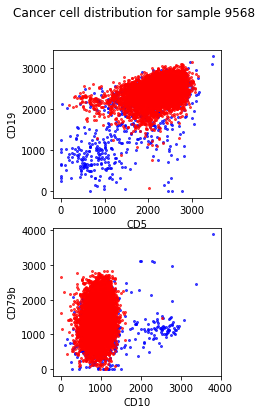

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2,figsize=(3,6))
fig.suptitle('Cancer cell distribution for sample 9568')



for x1,y1 in zip(healthy[:,8], healthy[:,9]):
    axs[0].plot(x1,y1,"o",color="blue", alpha=0.7,  markersize = 2)
    
for x1,y1 in zip(tumor[:,8], tumor[:,9]):
    axs[0].plot(x1,y1,"o",color="red", alpha=0.7,  markersize = 2)    
axs[0].set(xlabel='CD5', ylabel='CD19' )
    

for x2,y2 in zip(healthy[:,13], healthy[:,10]):
    axs[1].plot(x2,y2,"o",color="blue", alpha=0.7,  markersize=2)
    
for x2,y2 in zip(tumor[:,13], tumor[:,10]):
    axs[1].plot(x2,y2,"o",color="red", alpha=0.7,  markersize=2)
axs[1].set(xlabel='CD10', ylabel='CD79b' )

plt.savefig("9568.png",bbox_inches="tight")
plt.show()


In [26]:
plt.savefig("foo.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
for a in list_to_run:

    data = pd.read_csv("Testing/"+a+".txt.txt",sep = "\t")

    print(data)
    #train kmeans with new data
    data = data.to_numpy()
    kmeans = KMeans(n_clusters=100,init=center, random_state=0, max_iter=2)
    kmeans.fit(data)
    label = kmeans.labels_
    L = label.shape
    
    
    
    #record the number of cells in each clusters
    (unique, counts) = np.unique(label, return_counts=True)
    frequencies = np.asarray((unique, counts)).T

    #calculate tumor burden
    s = 0
    for c in cluster:
        s = frequencies[c][1]+s
    output.append(s/L)
    
    #calculate total cell number
    
    #cell cluster proportion calculation
    freqlist = np.empty([1,100])
    for f in frequencies:
        np.append(freqlist,f[1]/L)
    record.append(frequencies)
    proportion.append(freqlist)

In [30]:
a = range(5)
for i in a:
    print(i)

0
1
2
3
4
